# Ryan Razaan Gunawan - 2301878290 - LD01
Quiz 1 Machine Learning No. 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('credit-approval_csv.csv')
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


# Data Cleaning

Replacing Null Values using Imputation Method

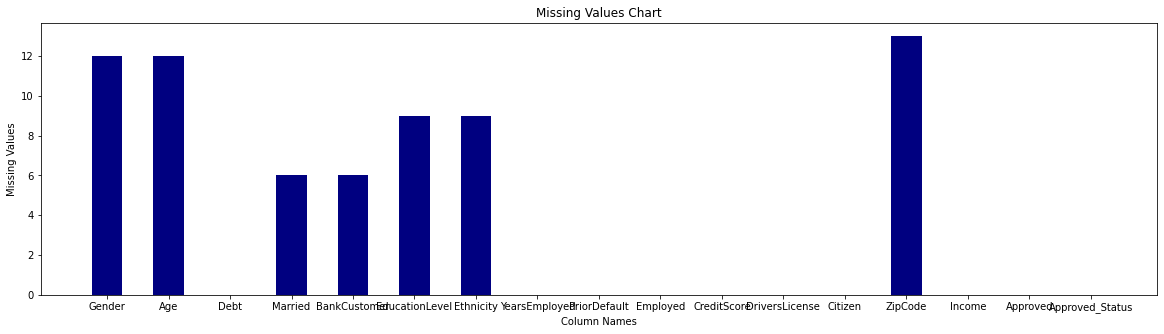

In [3]:
def visualize_null():
    column_name = list(df.keys())
    values      = list(df.isnull().sum())
    fig         = plt.figure(figsize = (20, 5))

    plt.bar(column_name, values, color ='navy', width = 0.5)
    plt.ylabel("Missing Values")
    plt.xlabel("Column Names")
    plt.title("Missing Values Chart")
    plt.show()

visualize_null()

As we can see, initially there are quite a lot of missing values in our dataset that we need to take care of

Imputation

In [4]:
def input_missing_values(data):
    for i in range(0,len(df.keys())):
        if df[df.keys()[i]].dtype == object:
            mode = df[df.keys()[i]].mode()[0]
            df[df.keys()[i]].fillna(mode, inplace=True)
        else:
            mean = df[df.keys()[i]].mean()
            df[df.keys()[i]] = df[df.keys()[i]].astype(float)
            df[df.keys()[i]].fillna(mean, inplace=True)

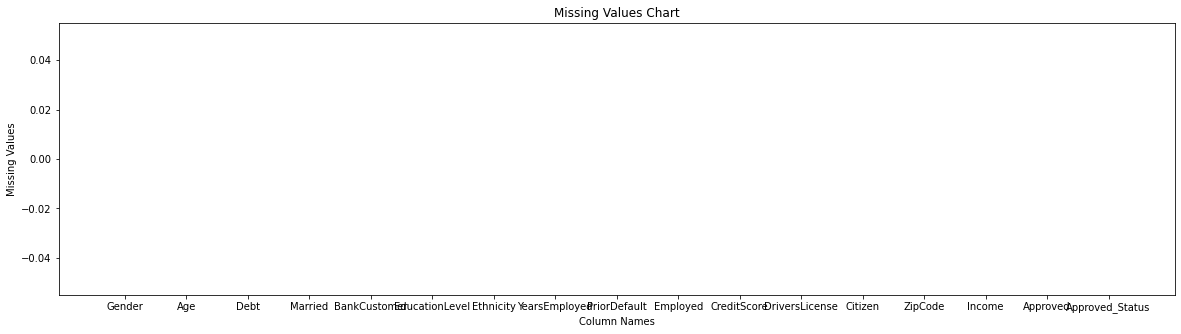

In [5]:
input_missing_values(df)
visualize_null()

Label Encoding

In [6]:
df.dtypes

Gender              object
Age                float64
Debt               float64
Married             object
BankCustomer        object
EducationLevel      object
Ethnicity           object
YearsEmployed      float64
PriorDefault        object
Employed            object
CreditScore        float64
DriversLicense      object
Citizen             object
ZipCode            float64
Income             float64
Approved            object
Approved_Status     object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

for i in df:
    if df[i].dtype == object:
        label_encoder = LabelEncoder()
        df[i] = label_encoder.fit_transform(df[i])

In [8]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,1.233333,0.475362,5.698551,5.098551,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,184.014771,1017.385507,0.555072,0.555072
std,0.460464,11.853273,4.978163,0.430063,0.850238,4.285748,2.510731,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,172.159274,5210.102598,0.497318,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,1.000000,0.000000,5.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,160.000000,5.000000,1.000000,1.000000
75%,1.000000,37.707500,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,272.000000,395.500000,1.000000,1.000000
max,1.000000,80.250000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,2000.000000,100000.000000,1.000000,1.000000


Fixing Outlier and Scaling the Dataset

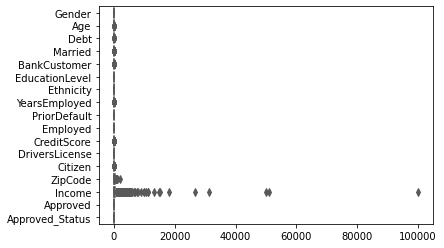

In [9]:
outliers = sns.boxplot(data=df, orient="h", palette="Set2")

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Gender               1.0000
Age                 15.0375
Debt                 6.2075
Married              0.0000
BankCustomer         0.0000
EducationLevel       9.0000
Ethnicity            4.0000
YearsEmployed        2.4600
PriorDefault         1.0000
Employed             1.0000
CreditScore          3.0000
DriversLicense       1.0000
Citizen              0.0000
ZipCode            192.0000
Income             395.5000
Approved             1.0000
Approved_Status      1.0000
dtype: float64


In [11]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.568171,4.758725,1.233333,0.475362,5.698551,5.098551,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,184.014771,1017.385507,0.555072,0.555072
std,0.460464,11.853273,4.978163,0.430063,0.850238,4.285748,2.510731,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,172.159274,5210.102598,0.497318,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000
50%,1.000000,28.625000,2.750000,1.000000,0.000000,5.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,160.000000,5.000000,1.000000,1.000000
75%,1.000000,37.707500,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,272.000000,395.500000,1.000000,1.000000
max,1.000000,80.250000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,2000.000000,100000.000000,1.000000,1.000000


In [12]:
# Remove Outlier from the dataset
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(305, 17)

In [13]:
df.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
count,305.000000,305.000000,305.000000,305.0,305.0,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0,305.000000,305.000000,305.000000,305.000000
mean,0.655738,28.950283,4.081689,1.0,0.0,5.826230,5.281967,1.249033,0.452459,0.396721,1.068852,0.445902,0.0,182.895130,122.636066,0.616393,0.616393
std,0.475908,9.720989,3.974938,0.0,0.0,4.330807,2.447979,1.444054,0.498553,0.490021,1.761759,0.497882,0.0,133.552088,224.865739,0.487063,0.487063
min,0.000000,15.750000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.750000,0.960000,1.0,0.0,1.000000,3.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.0,96.000000,0.000000,0.000000,0.000000
50%,1.000000,26.250000,2.500000,1.0,0.0,6.000000,7.000000,0.665000,0.000000,0.000000,0.000000,0.000000,0.0,160.000000,2.000000,1.000000,1.000000
75%,1.000000,34.250000,6.000000,1.0,0.0,10.000000,7.000000,1.750000,1.000000,1.000000,2.000000,1.000000,0.0,272.000000,146.000000,1.000000,1.000000
max,1.000000,59.670000,15.500000,1.0,0.0,13.000000,7.000000,6.040000,1.000000,1.000000,7.000000,1.000000,0.0,560.000000,960.000000,1.000000,1.000000


Scaling using Min-Max Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler
keys = df.keys()

scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)
df = pd.DataFrame(df, columns = keys)

In [15]:
df = df.drop(columns = ["Approved"])
df.describe()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved_Status
count,305.000000,305.000000,305.000000,305.0,305.0,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0,305.000000,305.000000,305.000000
mean,0.655738,0.300553,0.263335,0.0,0.0,0.448172,0.754567,0.206794,0.452459,0.396721,0.152693,0.445902,0.0,0.326598,0.127746,0.616393
std,0.475908,0.221334,0.256448,0.0,0.0,0.333139,0.349711,0.239082,0.498553,0.490021,0.251680,0.497882,0.0,0.238486,0.234235,0.487063
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.136612,0.061935,0.0,0.0,0.076923,0.428571,0.027318,0.000000,0.000000,0.000000,0.000000,0.0,0.171429,0.000000,0.000000
50%,1.000000,0.239071,0.161290,0.0,0.0,0.461538,1.000000,0.110099,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,0.002083,1.000000
75%,1.000000,0.421220,0.387097,0.0,0.0,0.769231,1.000000,0.289735,1.000000,1.000000,0.285714,1.000000,0.0,0.485714,0.152083,1.000000
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


Now that the data are cleaned and scaled, we can go ahead into data preparation

# Data Preparation

Splitting the dataset using train_test_split function from sklearn

In [16]:
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features,label, test_size = 0.2)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()

regressor.fit(x_train,y_train)

y_predicted = regressor.predict(x_test)
y_predicted

array([0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)

0.8688524590163934


In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted)

array([[20,  3],
       [ 5, 33]], dtype=int64)